In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Resources/myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
myopia_df = df.drop(["MYOPIC"], axis="columns")
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
for col in myopia_df.columns:
   print(f"{col}  : {myopia_df[col].isnull().sum()} null values")

AGE  : 0 null values
SPHEQ  : 0 null values
AL  : 0 null values
ACD  : 0 null values
LT  : 0 null values
VCD  : 0 null values
SPORTHR  : 0 null values
READHR  : 0 null values
COMPHR  : 0 null values
STUDYHR  : 0 null values
TVHR  : 0 null values
DIOPTERHR  : 0 null values
MOMMY  : 0 null values
DADMY  : 0 null values


In [5]:
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(myopia_df)
scaled_df[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [7]:
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(scaled_df)
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [8]:
print(f"The scaled shape is {scaled_df.shape} while the PCA transformed shape is {myopia_pca.shape}, thus the number of features have been reduced from 14 to 10.")

The scaled shape is (618, 14) while the PCA transformed shape is (618, 10), thus the number of features have been reduced from 14 to 10.


In [9]:
tsne = TSNE(learning_rate = 300, n_components=3, perplexity=55, verbose=1, n_iter=2000)
tsne_features = tsne.fit_transform(myopia_pca)

[t-SNE] Computing 166 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.003s...
[t-SNE] Computed neighbors for 618 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.466166
[t-SNE] KL divergence after 250 iterations with early exaggeration: 118.142723
[t-SNE] KL divergence after 2000 iterations: 2.580316


In [10]:
tsne_features.shape

(618, 3)

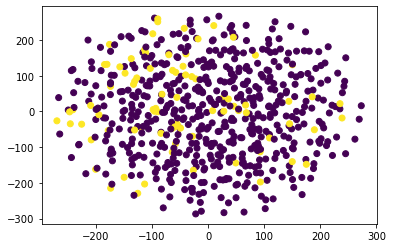

In [11]:
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=df['MYOPIC'])

In [12]:
inertia = []
k = list(range(1,11))

for i in k:
   km = KMeans(n_clusters=i, random_state=0)
   km.fit(myopia_pca)
   inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.627246
3,4,5665.932930
4,5,5377.262999


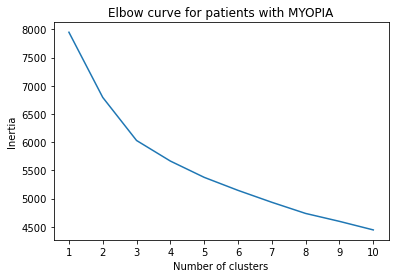

In [13]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for patients with MYOPIA')
plt.show()

In [14]:
def clusters(i, j):
   model = KMeans(n_clusters=i, random_state=0)
   model.fit(j)
   predictions = model.predict(j)
   j['class'] = model.labels_

   return j

In [15]:
col = []
for i in range(len(pca.components_)):
   col.append(i+1)
pca_df = pd.DataFrame(myopia_pca, columns=col)

In [16]:
clusters_df = clusters(3, pca_df)
clusters_df

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,1
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,0
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,0
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,1


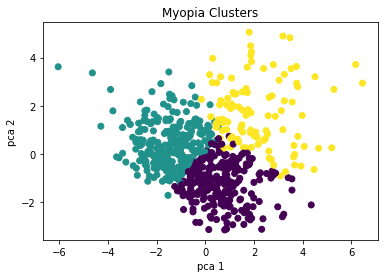

In [17]:
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.title('Myopia Clusters')
plt.show()